In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df =pd.read_csv("C:/Users/Atharva/Desktop/final/HousingData.csv")

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
X = df.drop(columns=["MEDV"])

In [10]:
y = df["MEDV"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
regressor.coef_

array([-1.14139919e-01,  2.90156278e-02, -2.71329054e-02,  3.24067342e+00,
       -1.60175433e+01,  4.75240956e+00, -1.95196142e-02, -1.52159267e+00,
        2.22822577e-01, -9.15063665e-03, -8.86045288e-01,  1.22626115e-02,
       -4.38440425e-01])

In [14]:
regressor.intercept_

np.float64(27.912465201030834)

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
y_pred.shape

(102,)

In [26]:
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(results.head())

   Actual  Predicted
0    23.6  29.143250
1    32.4  36.535668
2    13.6  14.492513
3    22.8  25.081110
4    16.1  18.456092


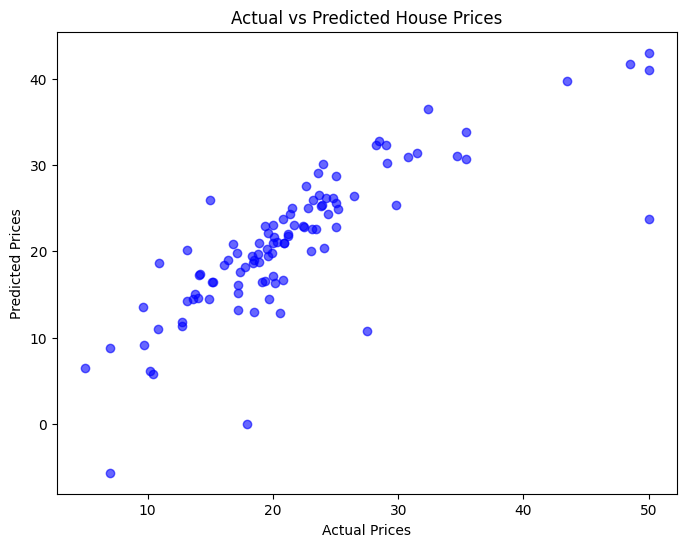

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [28]:
residual_errors = y_test - y_pred

In [29]:
residual_errors

173    -5.543250
274    -4.135668
491    -0.892513
72     -2.281110
452    -2.356092
         ...    
412    17.871266
436    -3.937938
411     1.102861
86     -0.295804
75     -2.980823
Name: MEDV, Length: 102, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 25.017672023842703


In [31]:
regressor.score(x_test, y_test)

0.658852019550814

In [32]:
from sklearn.metrics import r2_score
print("\nR² Score:", r2_score(y_test, y_pred))


R² Score: 0.658852019550814
